Давыдов ПИм-231 лаба 9 ммо

На основе рассмотренного на занятии Colab-ноутбука по распознаванию предметов одежды решите задачу распознавания рукописных цифр.

На этот раз примените не полносвязную, а сверточную нейронную сеть. Сравните полученные результаты работы сверточной нейронной сети с аналогичными результатами работы полносвязной нейронной сети.

Поэкспериментируйте с различными конфигурациями сети. Приведите графики долей правильных ответов на обучающем множестве и валидационном. Определите оптимальное количество эпох для обучения для каждой из используемых конфигураций нейронной сети.

Получите оценки качества классификаторов на тестовом множестве. Какая конфигурация из используемых лучше? Определите для каждой цифры на тестовом множестве точность работы классификаторов.

Проведите тестирование построенной модели на реальных данных с изображениями рукописных цифр.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import mnist
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras import utils
from keras.preprocessing import image
from google.colab import files
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [ ]:
batch_size = 150 # Размер мини-выборки
nb_classes = 10 # Количество классов изображений
nb_epoch = 25 # Количество эпох для обучения
img_rows, img_cols = 28, 28 # Размер изображений

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

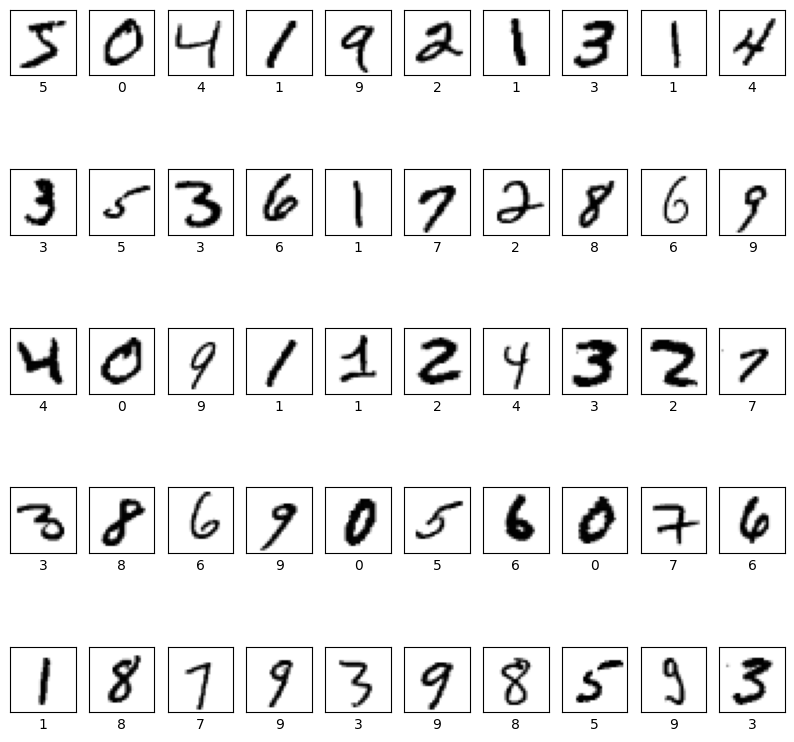

In [ ]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
n = 0 #тут должно быть 5
print(y_train[n])

5


In [ ]:
y_train = utils.to_categorical(y_train, nb_classes)
y_test = utils.to_categorical(y_test, nb_classes)

In [ ]:
print(y_train[n])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# Создаем последовательную модель нейронной сети
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(img_rows, (3, 3), padding='same',
                        input_shape=(img_rows, img_cols, 1), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(img_rows, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(2 * img_rows, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(2 * img_rows, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(8 * img_rows, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))

Не стал менять модель, точность очень высокая

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 28)        7084      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 28)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 28)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 56)        14168     
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 56)        28280     
                                                      

In [ ]:
history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.2,
              shuffle=True,
              verbose=1)

Epoch 1/25
320/320 [==============================] - 6s 12ms/step - loss: 0.2908 - accuracy: 0.9062 - val_loss: 0.0602 - val_accuracy: 0.9814
Epoch 2/25
320/320 [==============================] - 4s 11ms/step - loss: 0.0856 - accuracy: 0.9742 - val_loss: 0.0368 - val_accuracy: 0.9891
Epoch 3/25
320/320 [==============================] - 3s 10ms/step - loss: 0.0640 - accuracy: 0.9808 - val_loss: 0.0346 - val_accuracy: 0.9902
Epoch 4/25
320/320 [==============================] - 3s 10ms/step - loss: 0.0506 - accuracy: 0.9838 - val_loss: 0.0286 - val_accuracy: 0.9914
Epoch 5/25
320/320 [==============================] - 3s 11ms/step - loss: 0.0420 - accuracy: 0.9864 - val_loss: 0.0322 - val_accuracy: 0.9912
Epoch 6/25
320/320 [==============================] - 3s 10ms/step - loss: 0.0368 - accuracy: 0.9879 - val_loss: 0.0270 - val_accuracy: 0.9923
Epoch 7/25
320/320 [==============================] - 3s 10ms/step - loss: 0.0334 - accuracy: 0.9902 - val_loss: 0.0269 - val_accuracy: 0.9929

In [ ]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(X_test, y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 99.43%


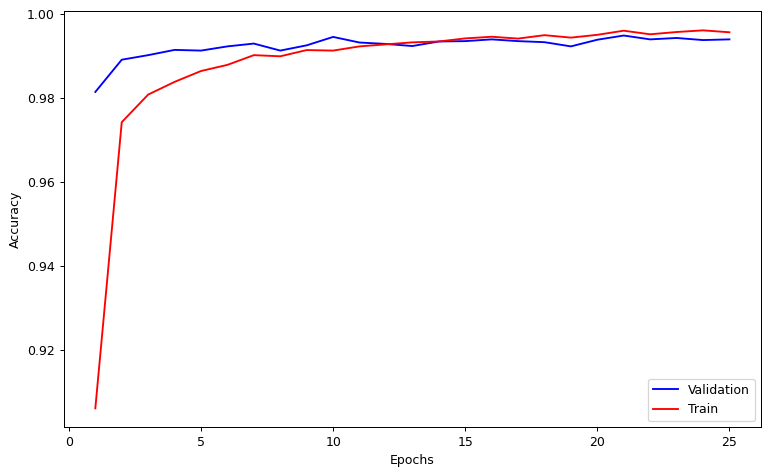

In [ ]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.figure(figsize=(10,6), dpi=90)
plt.plot(epochs, val_acc_values, 'b', label='Validation')
plt.plot(epochs, acc_values, 'r', label='Train')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Оптимальное количество эпох: 11-12

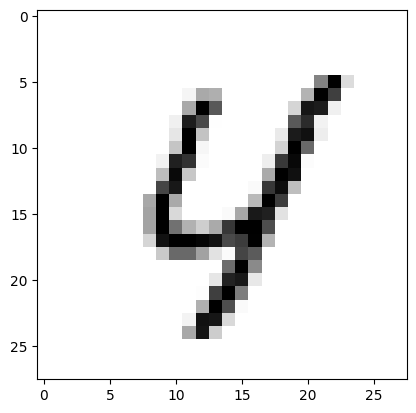

In [ ]:
n_test = 555
plt.imshow(X_test[n_test].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [ ]:
x = X_test[n_test]
x = np.expand_dims(x, axis=0)
prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Нейронка думает что это число:", prediction)

1/1 [==============================] - 0s 18ms/step
Нейронка думает что это число: 4


In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
#не сразу сообразил
y_test_classes = np.argmax(y_test, axis=1)

report = classification_report(y_test_classes, y_pred)
print(report)

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('Файл(ы) "{name}" размером {length} байт загружен(ы)'.format(
      name=fn, length=len(uploaded[fn])))

Saving 0.jpg to 0.jpg
Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
Saving 7.jpg to 7.jpg
Saving 8.jpg to 8.jpg
Saving 9.jpg to 9.jpg
Файл(ы) "0.jpg" размером 1045 байт загружен(ы)
Файл(ы) "1.jpg" размером 1035 байт загружен(ы)
Файл(ы) "2.jpg" размером 1157 байт загружен(ы)
Файл(ы) "3.jpg" размером 1126 байт загружен(ы)
Файл(ы) "4.jpg" размером 1059 байт загружен(ы)
Файл(ы) "5.jpg" размером 1037 байт загружен(ы)
Файл(ы) "6.jpg" размером 1063 байт загружен(ы)
Файл(ы) "7.jpg" размером 1102 байт загружен(ы)
Файл(ы) "8.jpg" размером 1225 байт загружен(ы)
Файл(ы) "9.jpg" размером 1176 байт загружен(ы)


Сначала взял одну картинку с цифрой попробовать угадать

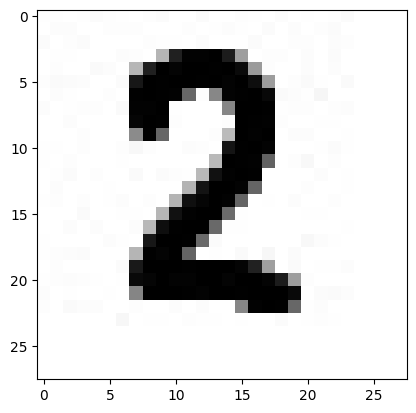

In [ ]:
img_path = '2.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
plt.imshow(img.convert('RGBA'))
plt.show()

In [ ]:
x = image.img_to_array(img)
x = 255 - x
x /= 255
x = np.expand_dims(x, axis=0)
prediction = model.predict(x)
print(prediction)
prediction = np.argmax(prediction)
print("На рисунке цифра: ", prediction)

1/1 [==============================] - 0s 79ms/step
[[3.6905665e-12 1.9252782e-09 1.0000000e+00 1.1364943e-12 5.5711647e-14
  8.7269013e-19 4.9209786e-12 1.7558041e-12 3.4097462e-13 3.1558976e-15]]
На рисунке цифра:  2


Сделал функцию, на основе кода выше, чтобы прогнать все картинки через цикл

In [ ]:
def SeqClassifier(index, uploaded, model):
  uploaded_files = list(uploaded.keys())
  selected_file = uploaded_files[index]
  selected_img = image.load_img(selected_file, target_size=(28, 28), color_mode="grayscale")
  plt.imshow(selected_img.convert('RGBA'))
  plt.show()

  x = image.img_to_array(selected_img)
  x = 255 - x
  x /= 255
  x = np.expand_dims(x, axis=0)
  prediction = model.predict(x)
  prediction = np.argmax(prediction)
  print("На рисунке цифра: ", prediction)

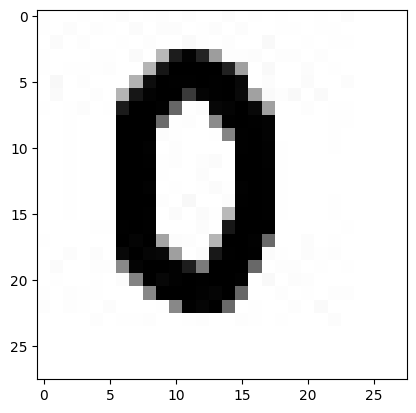

1/1 [==============================] - 0s 17ms/step
На рисунке цифра:  0


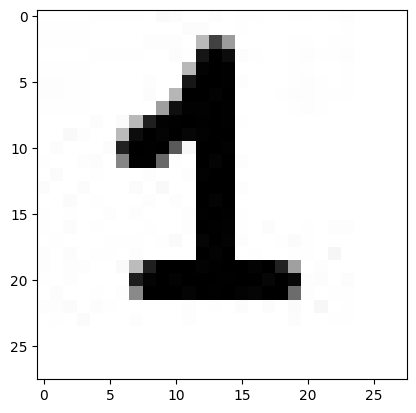

1/1 [==============================] - 0s 18ms/step
На рисунке цифра:  1


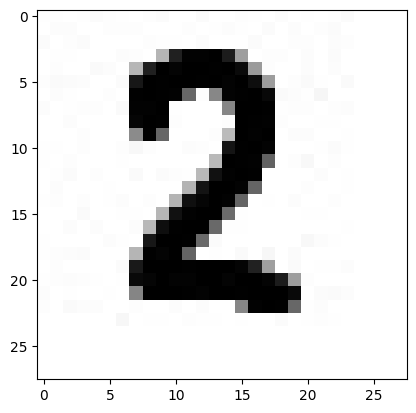

1/1 [==============================] - 0s 17ms/step
На рисунке цифра:  2


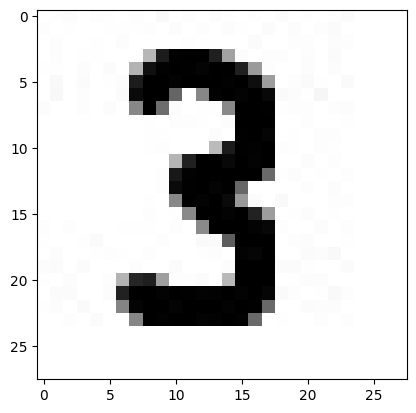

1/1 [==============================] - 0s 19ms/step
На рисунке цифра:  3


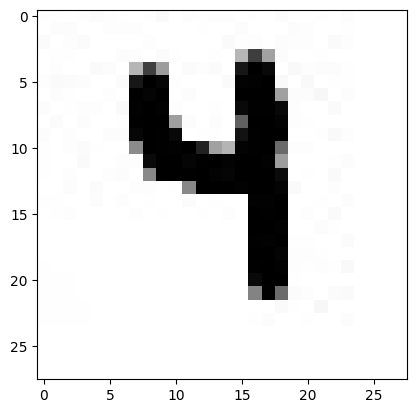

1/1 [==============================] - 0s 17ms/step
На рисунке цифра:  4


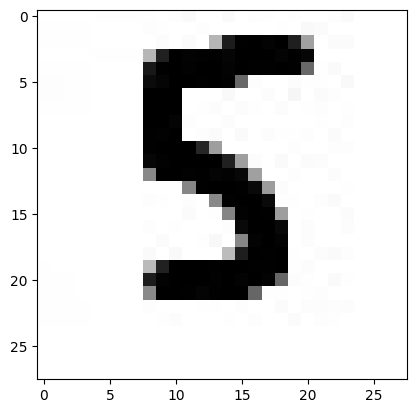

1/1 [==============================] - 0s 18ms/step
На рисунке цифра:  5


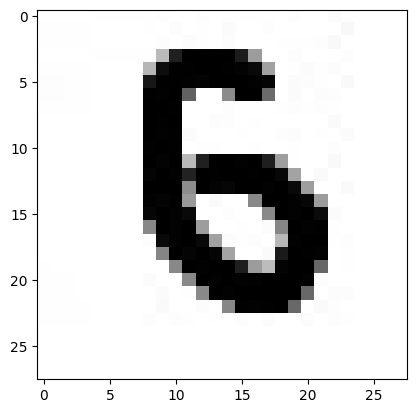

1/1 [==============================] - 0s 17ms/step
На рисунке цифра:  6


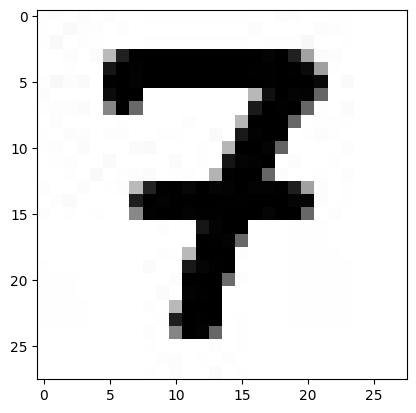

1/1 [==============================] - 0s 17ms/step
На рисунке цифра:  7


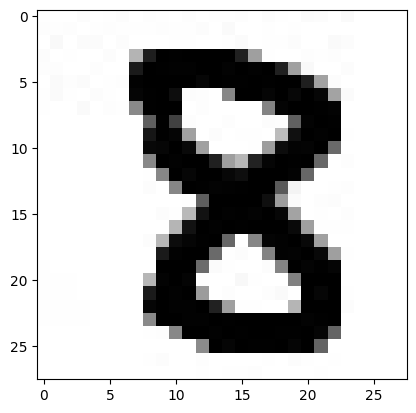

1/1 [==============================] - 0s 18ms/step
На рисунке цифра:  8


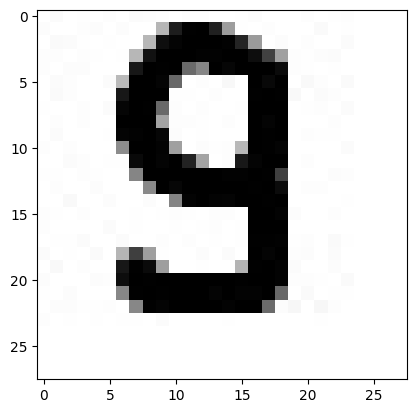

1/1 [==============================] - 0s 17ms/step
На рисунке цифра:  9


In [ ]:
for index in range(0, 10):
  SeqClassifier(index, uploaded, model)

Нейронная сеть угадала все цифры

Сверточная нейронная сеть справилась лучше полносвязной.